# Лабораторная работа №2 Гармоники

Кобыжев Александр, группа 3530901/80202

### Упражнение 2.2

In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, interact_manual, fixed
from IPython.html import widgets
from IPython.display import display

PI2 = 2 * math.pi

Напишем класс под названием `SawtoothSignal`, который имеет метод `evaluate` для оценки пилообразного сигнала.

In [2]:
class SawtoothSignal(thinkdsp.Sinusoid):    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

Теперь посмотрим, действительно ли создался пилообразный сигнал.

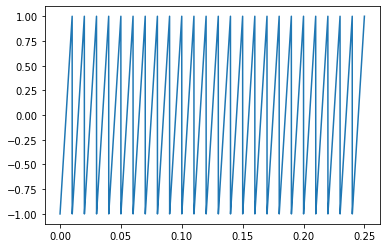

In [64]:
sawtooth = SawtoothSignal(100).make_wave(duration=0.25, framerate=20000)
sawtooth.plot()

Прослушаем получившийся звук.

In [65]:
sawtooth.make_audio()

Теперь выведем спектр.

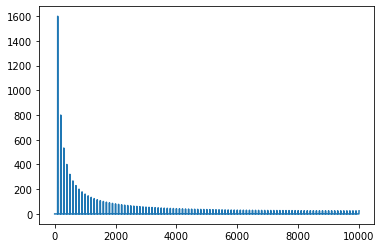

In [66]:
sawtooth.make_spectrum().plot()

Мы видим, что пилообразные гармоники спадают медленнее, чем прямоугольные.

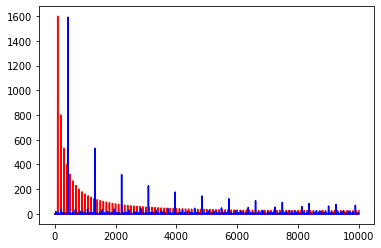

In [68]:
sawtooth.make_spectrum().plot(color='red')
square = thinkdsp.SquareSignal(amp=0.5).make_wave(duration=0.25, framerate=20000)
square.make_spectrum().plot(color='blue')

В результате получается, что по сравнению с треугольной волной пилообразная форма уменьшается практически аналогично, но включает как четные, так и нечетные гармоники.

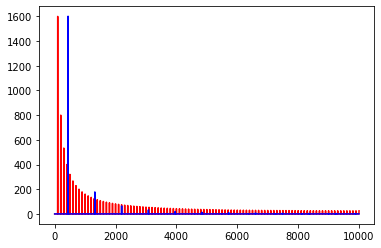

In [72]:
sawtooth.make_spectrum().plot(color='red')
triangle = thinkdsp.TriangleSignal(amp=0.79).make_wave(duration=0.25, framerate=20000)
triangle.make_spectrum().plot(color='blue')

### Упражнение 2.3

Сделаем прямоугольную волну и ее спектр.

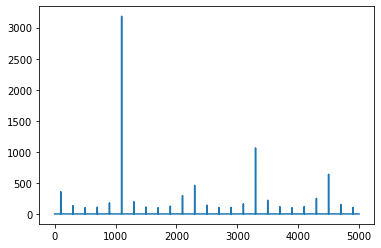

In [73]:
square = thinkdsp.SquareSignal(1100).make_wave(duration=0.5, framerate=10000)
square.make_spectrum().plot()

Основная и первая гармоника находятся в нужном месте, но вторая гармоника, которая должна быть 5500 Гц, смещается на 4500 Гц. Третья, которая должна быть 7700 Гц, находится на 2300 Гц и так далее.

In [74]:
square.make_audio()

Когда мы слушаем волну, мы можем слышать эти искаженные гармоники, поскольку низкий тон имеет частоту 300 Гц.

In [76]:
thinkdsp.SinSignal(300).make_wave(duration=0.5, framerate=10000).make_audio()

### Упражнение 2.4

Создадим треугольный сигнал с частотой 440 Гц и `wave` длительностью 0,01 секунды.

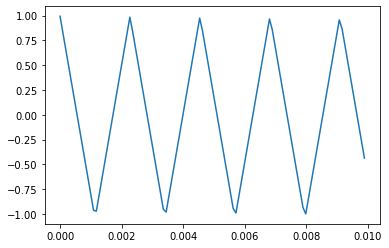

In [83]:
triangle = thinkdsp.TriangleSignal(440).make_wave(duration=0.01)
triangle.plot()

Первый элемент спектра - комплексное число, близкое к нулю. Если мы добавим в компонент нулевой частоты, это приведет к добавлению вертикального смещения спектра.

In [84]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

Теперь установим смещение равное 100 и увидим, что сигнал сместился по вертикали.

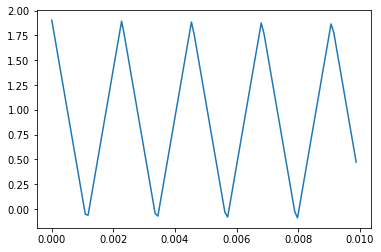

In [87]:
spectrum.hs[0] = 100
spectrum.make_wave().plot()

### Упражнение 2.5

Напишем функцию, которая требуется в задании.

In [89]:
def filter_spectrum(spectrum):
    spectrum.hs /= spectrum.fs
    spectrum.hs[0] = 0

Создадим прямоугольный сигнал и прослушаем его.

In [90]:
wave = thinkdsp.SquareSignal(freq=440).make_wave(duration=0.5)
wave.make_audio()

Выведем только что созданный спектр, а также изменим его при помощи нашей функции и посмотрим результат.

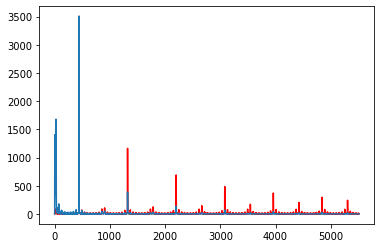

In [91]:
high = 10000
spectrum = wave.make_spectrum()
spectrum.plot(high=high, color='red')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=high)

Фильтр подавляет гармоники, поэтому он действует как фильтр нижних частот. Звук звучит почти как синусоида:

In [92]:
filtered = spectrum.make_wave()
filtered.make_audio()

### Упражнение 2.6

Создадим пилообразный сигнал и выведем его спектр.

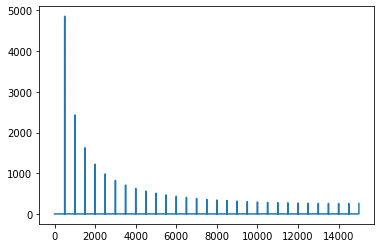

In [93]:
freq = 500
signal = thinkdsp.SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=30000)
wave.make_audio()
spectrum = wave.make_spectrum()
spectrum.plot()

На рисунке видно, что гармоники уменьшаются как 1 / 𝑓 ^ 2.

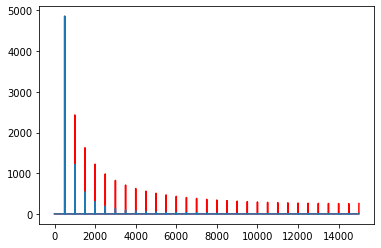

In [94]:
spectrum.plot(color='red')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()

Воспроизведём полученный звук.

In [95]:
wave = spectrum.make_wave()
wave.make_audio()

Теперь гармоника выглядит как синусоида.

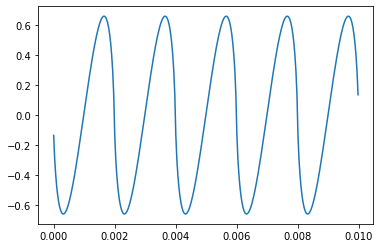

In [96]:
wave.segment(duration=0.01).plot()